# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express is an online news portal company wanting to expand its business by acquiring new subscribers. There is a opinion that there has been a decline in new monthly subcribers compared to last year because of the current webpage being not engaging and attractive for the customers to make a decision to subscribe. The company is trying to analyse the actions from the customers based on their interest, to give them a better a engagement in the new webpage.

### Objective
The new landing page has been created with more relevance to the customer interests. To examine the effectiveness of the new landing page, Data scientist conducted an experiment by randomly selecting 100 users and divided them equally into control group and treatment group. Existing page was served to the control group and new landing page is given to the treatment group. Interactions of users data has been collected and asked to explore the data and perform a statistical analysis( level of significance = 5%) to findout the effectiveness of the new landing page in gathering new subcribers for the news portal with the below questions.
1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? 

4. Is the time spent on the new page the same for the different language users?

### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head() # The top 5 rows of the dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail() # The bottom 5 rows of the dataframe

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Observation:
User Id  & Time spent on the page is the integer and float datatype. 
Other columns such as group,landing_page,converted and language_preferred are object datatype. 

In [6]:
df.shape

(100, 6)

## Observation:
Dataset consists of  100 rows and 6 columns

In [7]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


## Observation:

1. Average time spent on a page is 5.37 minutes. Median value for time spent is 5.4 minutes which is almost equal to mean value. So the distribution is not skewed.
2. Minimum and maximum time spent on a page is 0.19 minutes and 10.71 minutes respectively.
3. 75% of customers spend 7 minutes around in the web page.

In [8]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

## Observation:
There are no Missing values in the data.

In [9]:
duplicate_userids = df[df.duplicated(subset='user_id', keep= False)]
print("Duplicate User IDs:")
print(duplicate_userids)

Duplicate User IDs:
Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


## Observation:
Empty dataframe indicated there are no duplicates in user_id.

### Univariate Analysis

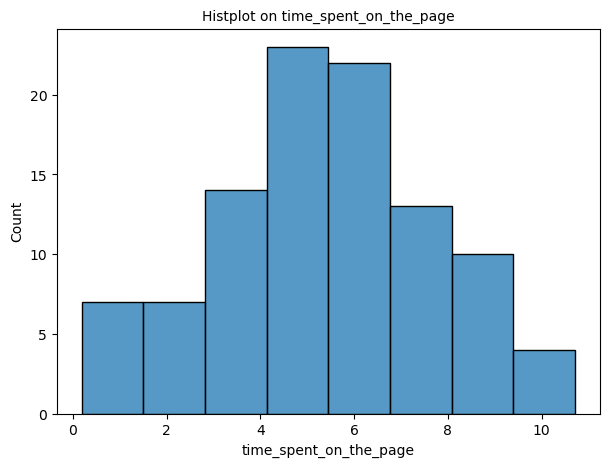

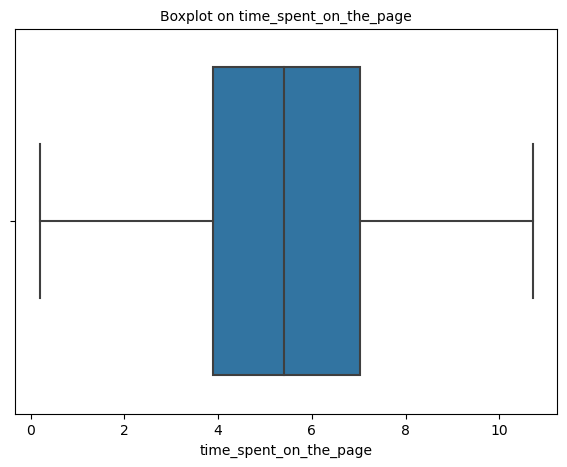

In [10]:
# Time spent on the page 
plt.figure(figsize = (7,5))
plt.title('Histplot on time_spent_on_the_page', fontsize = 10)
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
plt.figure(figsize = (7,5))
plt.title('Boxplot on time_spent_on_the_page', fontsize = 10)
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

## Observation:
We observe from the above plot the time_spent_on_the_page columns follows normal distribution.And there are no outliers and the box is not skewed.
Mean and Median value for this column lies almost equal to 5.4 minutes 

In [11]:
# Group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

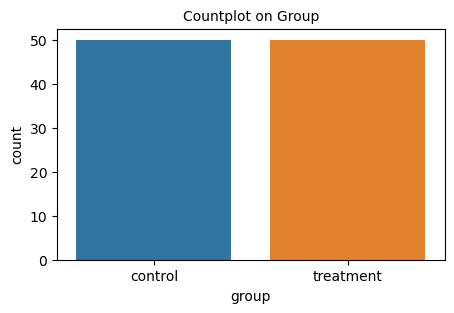

In [12]:
# Analysis of Group Column
plt.figure(figsize = (5,3))
sns.countplot(data=df,x='group')
plt.title('Countplot on Group', fontsize = 10)
plt.show()

## Observation:
As mentioned in the problem statement, the customers are divided into two groups as control (50 customers) and treatment (50 customers) for data analysis.

In [13]:
# landing page 
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

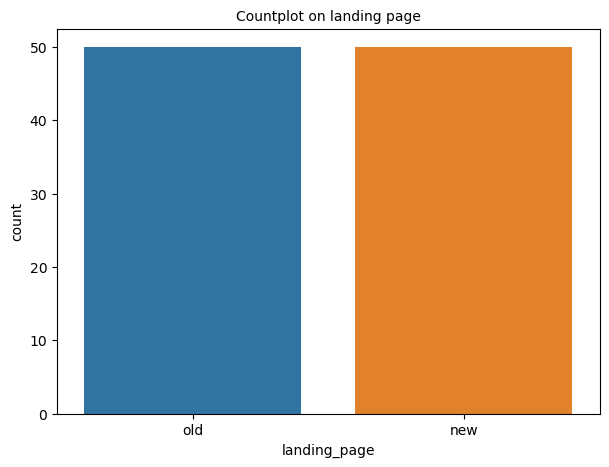

In [14]:
# Plot on landing page column
plt.figure(figsize = (7,5))
sns.countplot(data=df,x= 'landing_page')
plt.title('Countplot on landing page', fontsize = 10)
plt.show()

## Observation:
As mentioned in the problem statement, 
1. Customers in control group served with existing page (50 nos)
2. Customers in treatment group served with new page (50 nos)

In [15]:
# converted column analysis
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

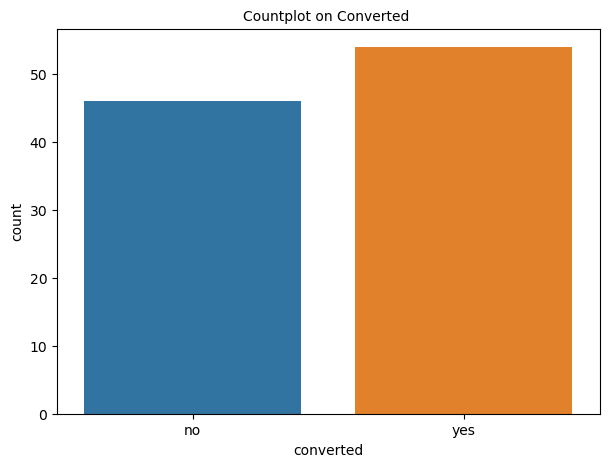

In [16]:
# Plot on converted column
plt.figure(figsize = (7,5))
sns.countplot(data=df,x= 'converted')
plt.title('Countplot on Converted ', fontsize = 10)
plt.show()

## Observation:
From the sample data, we observe that the 54 out of 100 customers have opted for the subscription in the webpage.

In [17]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

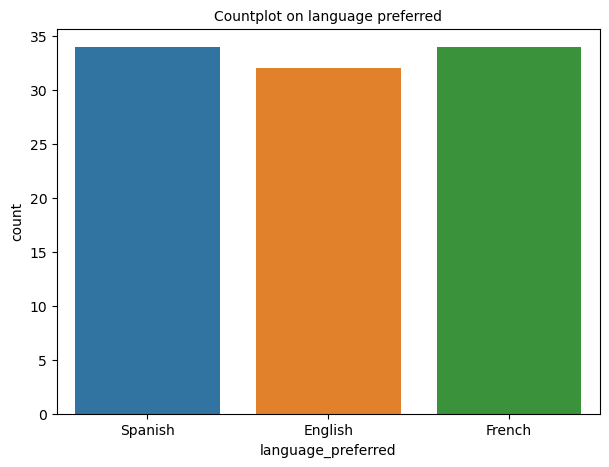

In [18]:
# Plot on language preferred
plt.figure(figsize = (7,5))
sns.countplot(data=df,x='language_preferred')
plt.title('Countplot on language preferred', fontsize = 10)
plt.show()

## Observation:
From the above plot we observe that the news portal webpage is being served in three different languages English, Spanish and French.
French and Spanish has equal number of customers whereas English has comparitively little less.

### Bivariate Analysis

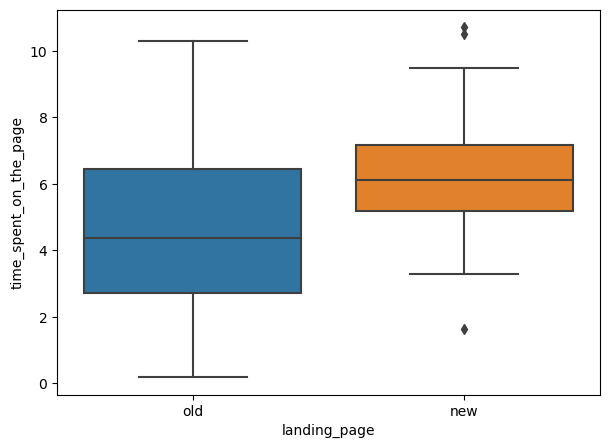

In [19]:
# Plot on landing page vs time spent on the page
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

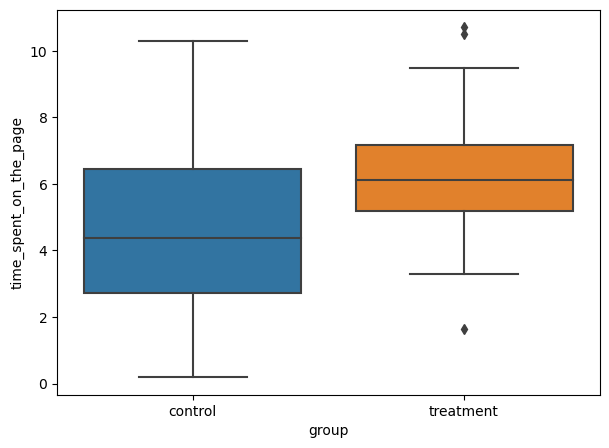

In [20]:
# Plot on group vs time spent on the page
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.show()

## Observations:
Time spent on the new page is overall more than old page and it has some outliers too. New page has made customers to spend more time in the reading through the webpage. Same way if we plot between control and treatment group we get same results.

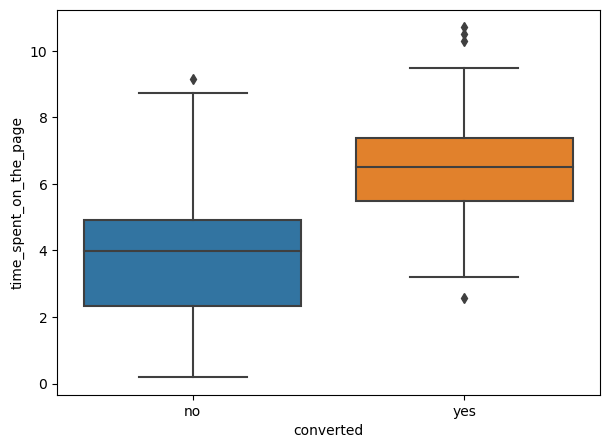

In [21]:
# Plot converted vs time spent on the page
plt.figure(figsize=(7, 5))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

## Observation:

As per the above plot, customers who spent more time in the webpage have also converted their subscription which is a good hint that the customers are feeling engaged.

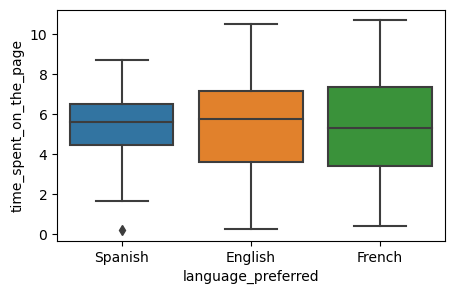

In [22]:
# Plot language preferred vs time_spent_on_the_page
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

## Observation:
When reading the above plot we say that mean time spent in the webpage in all three languages are around same.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

The mean time spent in the landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


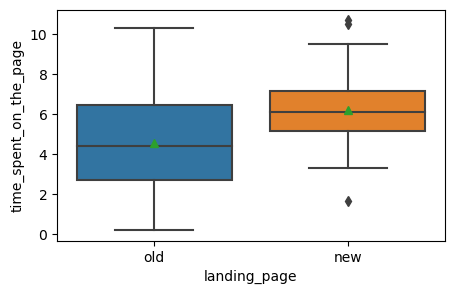

In [23]:
plt.figure(figsize=(5,3))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', showmeans = True, data = df)
mean_time_landing_page = df.groupby('landing_page')['time_spent_on_the_page'].mean()
print('The mean time spent in the',mean_time_landing_page)
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent in new page and old page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. So we are choosing Two sample t test

### Step 3: Decide the significance level

From the problem statement, $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [24]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [25]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [26]:
from scipy.stats import ttest_ind
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [27]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

p- value is very less compared to  𝛼. We can reject the null hypothesis. We do have significant evidence to say that the customers are more interested to spend time reading the new page than the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

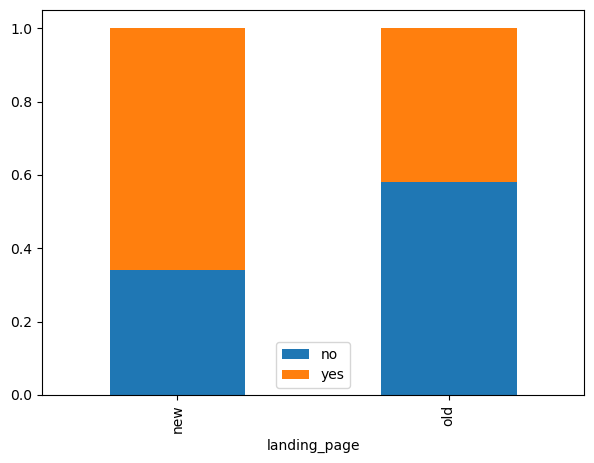

In [28]:
pd.crosstab(df['landing_page'],df['converted'], normalize = 'index').plot(kind="bar", figsize=(7,5), stacked = True)
plt.legend()
plt.show()

## Null and Alternate Hypothesis
Let  𝑝1,𝑝2  be the proportions of conversions in new and old landing page respectively.

The manufacturer will test the null hypothesis

𝐻0: 𝑝1=𝑝2
 
against the alternate hypothesis

𝐻𝑎: 𝑝1 > 𝑝2

This is a one-tailed test concerning two population proportions from two independent populations.

In [29]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

no_of_control = df.group.value_counts()['control']
no_of_treatment = df.group.value_counts()['treatment'] 

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(no_of_control, no_of_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [30]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [no_of_treatment, no_of_control], alternative = 'larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [31]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


## Inference

p- value is very less compared to 𝛼. We can reject the null hypothesis. We do have significant evidence to say that the customers are inclined towards choosing a subscription when they are served with the new webpage.

## 3. Is the conversion and preferred language are independent or related?

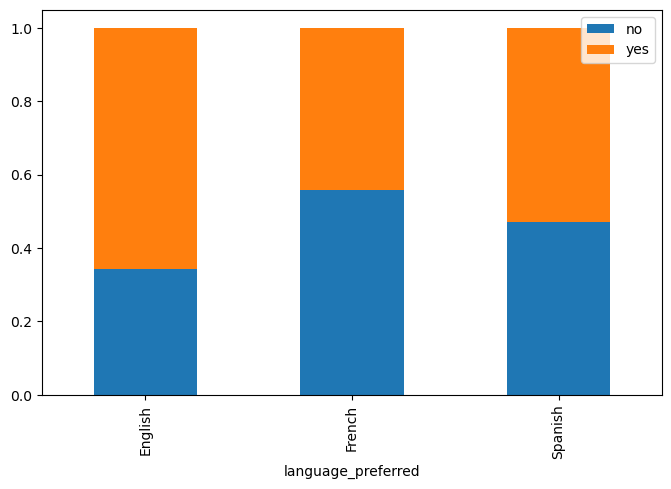

In [32]:
pd.crosstab(df['language_preferred'],df['converted'], normalize = 'index').plot(kind="bar", figsize=(8,5), stacked = True)
plt.legend()
plt.show()


This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. We follow chi squared test of independance.

## Null and Alternate Hypothesis

𝐻0: Conversion rate independant of language preferred
 

𝐻𝑎: Conversion rate is dependant of language preferred

As given in the problem statement, we select α = 0.05.

### Checking whether the assumptions are satisfied 

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [33]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [34]:
from scipy.stats import chi2_contingency  

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table) 

print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [35]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


## Inference

The p- value is more compared to 𝛼. We fail to reject the null hypothesis. We donot have significant evidence to say that the subscriptions are depending on the language preferred. 

## 4. Is the time spent on the new page same for the different language users?

In [36]:
df_1= df[df['landing_page'] == 'new']

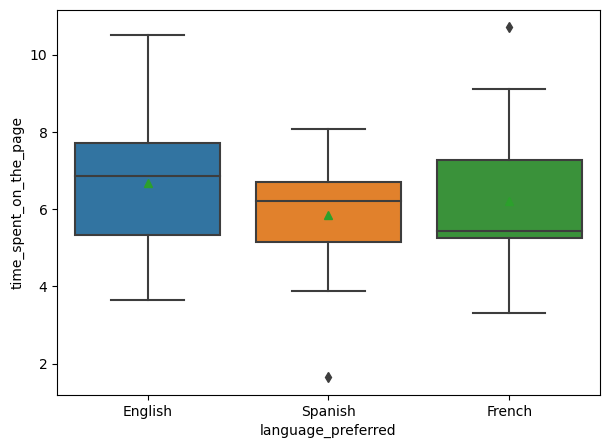

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_1)
plt.show()


In [38]:
df_1.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

## Null Hypothesis:

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for English, French and Spanish respectively.We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the language users mean is different from the rest

##### This is a problem, concerning three population means. We are doing f-oneway Anova test. Before that we will test the assumptions of f_oneway anova test

### Shapiro wik test
Let's check whether the population is normally distributed.
We will test the null hypothesis

𝐻0:
  Time spent on the page follows a normal distribution against

𝐻𝑎:
  Time spent on the page does not follow a normal distribution



In [39]:
from scipy import stats
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643193125724792


Since p-value of the test is very large, we fail to reject the null hypothesis that the time_spent_on_the_page follows the normal distribution.

### Levene’s test
We will test the null hypothesis

𝐻0
 : All the population variances are equal



𝐻𝑎
 : At least one variance is different from the rest

As given in the problem statement, we select α = 0.05.

In [40]:
time_spent_English = df_1[df_1['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_1[df_1['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_1[df_1['language_preferred']=='Spanish']['time_spent_on_the_page']  

In [41]:
from scipy.stats import levene
statistic, p_value = levene( time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

## Assumptions:
1. The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
2. Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
3. Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

As given in the problem statement, we select α = 0.05.

In [42]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)  
print('The p-value is', p_value)

The p-value is 0.43204138694325955


In [43]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Inference:

From the above test we fail to reject the null hypothesis and can conclude that the mean time spent on the new page is same for different language users. And it can be seen from the box plot as well that the mean value lies around the same value for all language users.

## Conclusion 

1. Mean and Median value for time spent on the page column lies almost equal to 5.4 minutes.
2. We do have significant evidence to say that the customers are inclined towards choosing a subscription when they are served with the new webpage.
3. Mean Time spent on the new page is almost equal and it doesnot depend on the languages preferred.
4. Conversion rate of subscribers is independant of the languages preferred.
5. Conversion rate of subscribers is more when they land on the new page.
6. Time spent in the new page is higher than the time spent on the old page.
7. Readers are more interested in the new content and so they are more leaned towards subscribing as well.


## Recommendations

1. Conversion rate of subscribers is more when they land on the new page so that's a positive response from the customers. But yet if the company can share data in more numbers we can strongly conclude that our goal to attract more customers is achieved.
2. Conversion rate and time spent doesnot depend on the languages preferred so it looks like purely based on the content that is shared in the webpage.
3. Time spent on the new page is more so that itself says that the customers are engaged. The company can work more to keep the content informative and engaging.
4. The E-news Express company should keep focusing on the Content quality and Variety, User experience and Interactivity through their online portal.
5. The company can also concentrate on Community engagement, Social media and also be a socially responsible medium to connect and serve the customers which will pave its aim of achieving more subscribers and its target.




___